In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
#loading the model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Layer
import tensorflow as tf

# Define or register the 'Cast' operation if necessary
class Cast(Layer):
    def call(self, inputs):
        return tf.cast(inputs, tf.float32)

# Load the model with custom objects
loaded_model = load_model(
    '/content/drive/MyDrive/sugarcane_model.h5',
    custom_objects={'Cast': Cast}
)
print("Model loaded successfully!")



Model loaded successfully!


In [6]:
validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    '/content/drive/MyDrive/sugarcane dataset /Test',  # Replace with your actual validation data path
    target_size=(224, 224),      # Ensure this matches your model's input size
    batch_size=32,
    class_mode='sparse'
)


Found 504 images belonging to 5 classes.


In [7]:
# Evaluate the model on the validation/test dataset
loss, accuracy = loaded_model.evaluate(validation_generator)  # Use test_generator if you have a separate test set
print(f"Model Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 356s 22s/step - accuracy: 0.8045 - loss: 0.5792
Model Accuracy: 82.94%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step


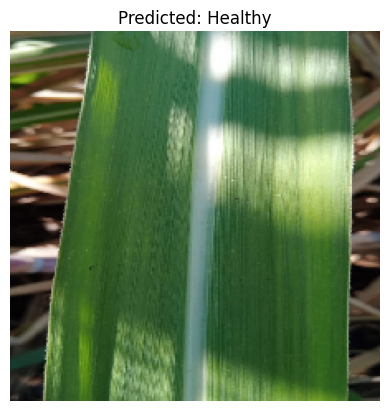

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path to your test image
image_path = '/content/healthy (158).jpeg'  # Replace with the path to your test image

# Load and preprocess the image
img = load_img(image_path, target_size=(224, 224))  # Adjust target size to your model's input size
img_array = img_to_array(img) / 255.0  # Normalize the image
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Map the predicted class index to the actual class name
class_indices = validation_generator.class_indices  # Assuming you used train_generator for training
class_labels = {v: k for k, v in class_indices.items()}  # Reverse the mapping
predicted_label = class_labels[predicted_class]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()
